In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

Vamos a implementar la regla de simpson para calcular una integral de una función definida

In [ ]:
f = lambda x: x**2
dominio = np.linspace(0, 5, 100)

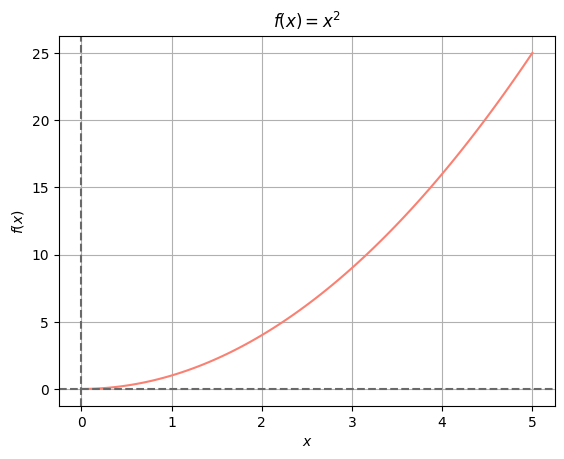

In [ ]:
plt.plot(dominio, f(dominio), color = "salmon")
plt.title("$f(x) = x^{2}$")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.grid()
plt.show()

In [ ]:
#@title De forma manual

#supongamos 11 puntos en este intervalo

x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5.0])
N=len(x) # numero de puntos
n=len(x)-1 #numero de intervalos

#calculamos la primera sumatoria para tomar los valores pares en x evaluados en la funcion
sumapares = f(x[2:n-1:2]).sum()
print(f"la sumatoria de números pares es: {sumapares}")

#calculamos la segunda sumatoria para tomar los valores impares en x evaluados en la funcion
sumaimpares = f(x[1:n:2]).sum()
print(f"la sumatoria de números pares es: {sumaimpares}")

#ahora empleamos la regla de simpson y calculamos el resultado de la integral
h = (x[-1] - x[0])/n
I = (h/3) * ((f(x[0])) + (2*sumapares) + (4*sumaimpares) + (f(x[-1])))
print(f"El valor de la integral es: {I}")


la sumatoria de números pares es: 30.0
la sumatoria de números pares es: 41.25
El valor de la integral es: 41.666666666666664


In [ ]:
#@title Para comparar el resultado de la integral usamos la librería de scipy.integrate

Integralcomparativa = sp.integrate.simpson(f(dominio), dominio)
Integralcomparativa

41.66666666666667

In [ ]:
#@title Ahora definimos la función que realiza la operación

def integral_sipmson(f, xi, xf, n):  #recibe la funcion, el intervalo de integracion y el numero de subintevalos impares
  intervalo = np.linspace(xi, xf, n)
  sumapares = f(intervalo[2:(len(intervalo)-1)-1:2]).sum()
  sumaimpares = f(intervalo[1:(len(intervalo)-1):2]).sum()
  h = (intervalo[-1] - intervalo[0])/(len(intervalo)-1)
  integral = (h/3) * ((f(x[0])) + (2*sumapares) + (4*sumaimpares) + (f(intervalo[-1])))

  return integral

integral_sipmson(f, 0, 5, 11)

41.666666666666664

### Por último, verificamos la función que integral_sipmson para otras funciones

In [40]:
#@title definimos las funciones

g = lambda x: np.sin(x)
h = lambda x: np.exp(x)
l = lambda x: 1 - x**2 + x**4

ig = np.linspace(0, 20, 101)
ih =np.linspace(0, 20, 101)
il  = np.linspace(0, 20, 101)

In [42]:
#@title calculamos la integral por medio de la función
i1 = integral_sipmson(g, 0, 20, 101)
i2 = integral_sipmson(h, 0, 20, 101)
i3 = integral_sipmson(l, 0, 20, 101)

print(i1, i2, i3)

0.5919232248397827 485169486.53910404 637353.3376000002


In [44]:
#@title Verificamos con scipy

i11 = sp.integrate.simpson(g(ig), ig)
i22 = sp.integrate.simpson(h(ih), ih)
i33 = sp.integrate.simpson(l(il), il)

print(i11, i22, i33)

0.5919232248397812 485169486.5391037 637353.3376
